In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from scipy.stats import  kurtosis
from sklearn.decomposition import DictionaryLearning

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size': 22})

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

data = pd.read_csv('car.data', header=None)
data.columns = ['buying', 'maint','doors', 'persons','lug_boot', 'safety','class']

print("Dataset Shape: ", data.shape)
data.head()

Dataset Shape:  (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

# Label Encoding
Original Dataset
```
   buying       vhigh, high, med, low
   maint        vhigh, high, med, low
   doors        2, 3, 4, 5more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
   
   class        unacc, acc, good, vgood
```

Encoded Dataset
```
   buying       4, 3, 2, 1
   maint        4, 3, 2, 1
   doors        2, 3, 4, 5
   persons      2, 4, 6
   lug_boot     1, 2, 3
   safety       1, 2, 3
   
   class        0, 1, 2, 3
```
Note: There is no dash symbol in original dataset, only appears in dataset description.

In [4]:
def label_encoding(car_dataset):
    encoded = car_dataset.replace('vhigh', 4).replace('high', 3).replace('med', 2).replace('low', 1)\
    .replace('5more', 5).replace('more', 6).replace('small', 1).replace('big', 3).replace('unacc', 0)\
    .replace('acc', 1).replace('good', 2).replace('vgood', 3)
    return encoded

In [5]:
data = label_encoding(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from external_fn import plot_learning_curve, plot_validation_curve, plot_roc_auc_curve

from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score

x = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = data['class']

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42, stratify=y)

In [8]:
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [9]:
result = {
    'k-means': {}, 
    'Expectation_Maximization': {},
    'PCA': {},
    'ICA': {},
    'Randomized_Projections': {},
    'Infomation_Gain': {},
    'experiments': [],
    'Step4_Neural_Network': {},
    'Step5_Neural_Network': {},
}

In [10]:
%%time
task = "k-means"

f1 = []
train_acc = []
test_acc = []
params = [4]

for k in params:
    print("K = ", k)
    clf = KMeans(n_clusters=4)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        # "roc_auc": roc_auc_score(y_test, y_pred,multi_class='ovr'),
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        # "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='roc_auc'),
    }
    print("Accuracy: ", result[task][k]["accuracy_score"])
    # print("ROC AUC score: ", result[task][k]["roc_auc"])
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    # print("Cross Validation Score")
    # print(result[task][k]["cross_validation_score"])

    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # plot_learning_curve(clf, f"{task} (k={k})", x, y, axes=None, cv=10, n_jobs=4)
    # plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    # plt.show()
    
# # Validation Curve
# new_params = params
# plot_validation_curve(KMeans(), f"{task}: n_neighbors", x, y, "n_neighbors", new_params, scoring="accuracy", axes=None, cv=10, n_jobs=4)
# plt.savefig(f'mental_plots/validation_curve_{task}.png')
# plt.show()

K =  4
Accuracy:  0.41040462427745666
F1 Score:  0.5265941972521432
Training Accuracy:  -5669.217744111607
Testing Accuracy:  -2505.9283010402305
Confusion Matrix
[[173  44  73  73]
 [  0  37  35  43]
 [  0  13   0   8]
 [  0  14   3   3]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.48      0.65       363
           1       0.34      0.32      0.33       115
           2       0.00      0.00      0.00        21
           3       0.02      0.15      0.04        20

    accuracy                           0.41       519
   macro avg       0.34      0.24      0.25       519
weighted avg       0.78      0.41      0.53       519

CPU times: user 92.4 ms, sys: 79.3 ms, total: 172 ms
Wall time: 72.8 ms


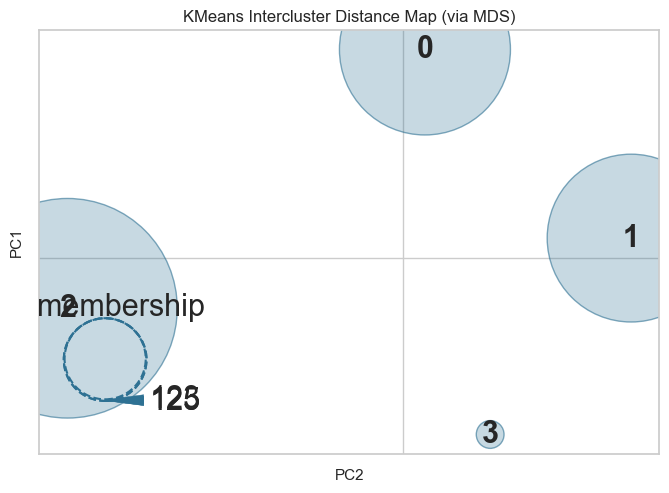

In [11]:
from yellowbrick.cluster import intercluster_distance
from yellowbrick.cluster import silhouette_visualizer

visualizer = intercluster_distance(KMeans(4, random_state=42), x_test)

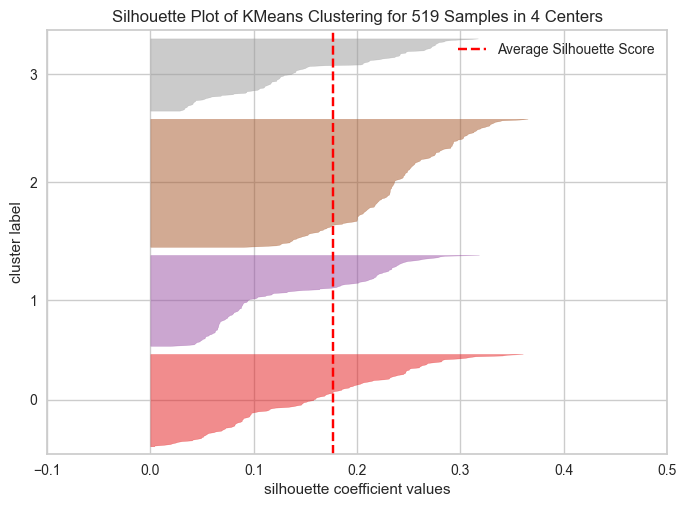

In [12]:
visualizer = silhouette_visualizer(KMeans(4, random_state=42), x_test)

In [13]:
from external_fn import *

In [14]:
scaler = preprocessing.StandardScaler().fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

CPU times: user 3 µs, sys: 16 µs, total: 19 µs
Wall time: 5.01 µs


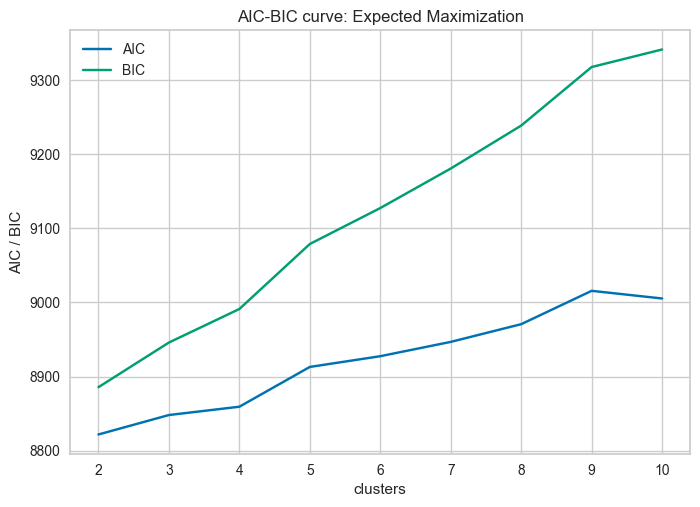

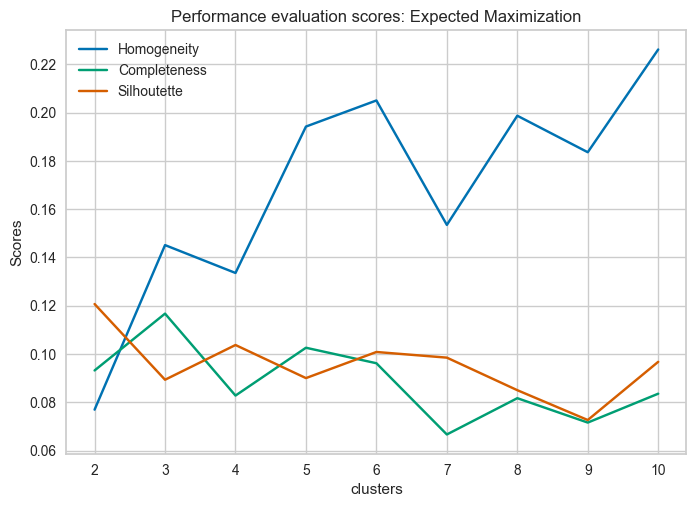

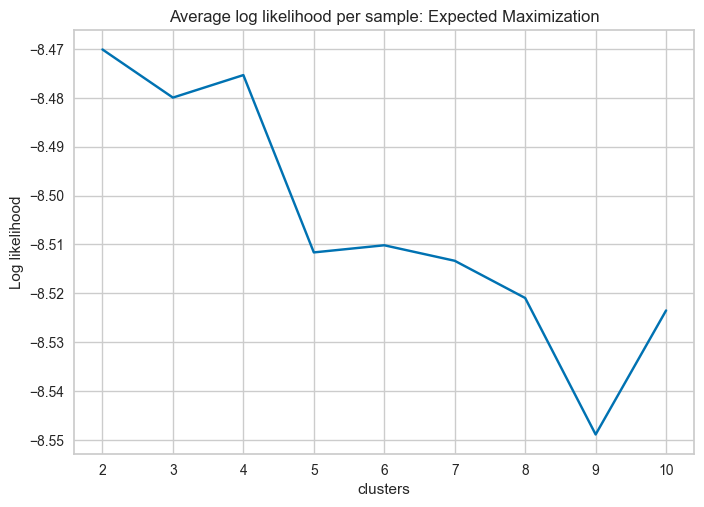

Training accuracy for Expected Maximization for K = 4:  75.68238213399503
Testing accuracy for Expected Maximization for K = 4:  71.29094412331408
accuracy_score 	 0.7129094412331407
f1 	 0.7024737731286462
confusion_mat 	 [[314  33  13   3]
 [ 66  40   5   4]
 [  7   3   9   2]
 [  1  11   1   7]]
classification_report 	               precision    recall  f1-score   support

           0       0.81      0.87      0.84       363
           1       0.46      0.35      0.40       115
           2       0.32      0.43      0.37        21
           3       0.44      0.35      0.39        20

    accuracy                           0.71       519
   macro avg       0.51      0.50      0.50       519
weighted avg       0.70      0.71      0.70       519



In [15]:
%time
num_class = 4
means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(num_class)])
clf_em = expectation_maximization(X_train, X_test, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10], num_class = num_class)

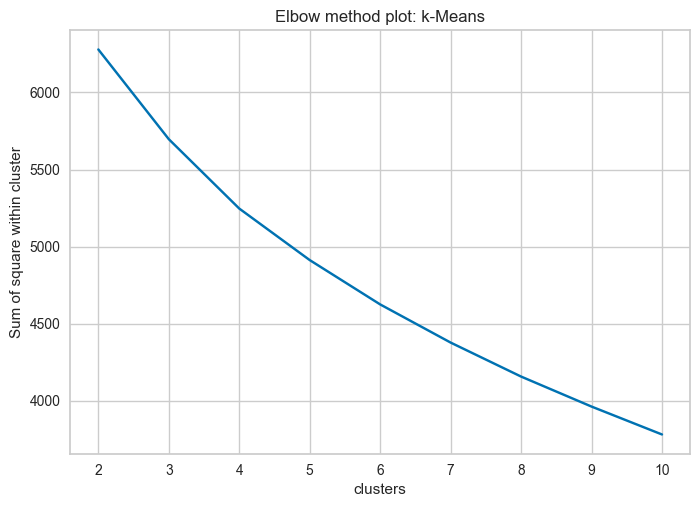

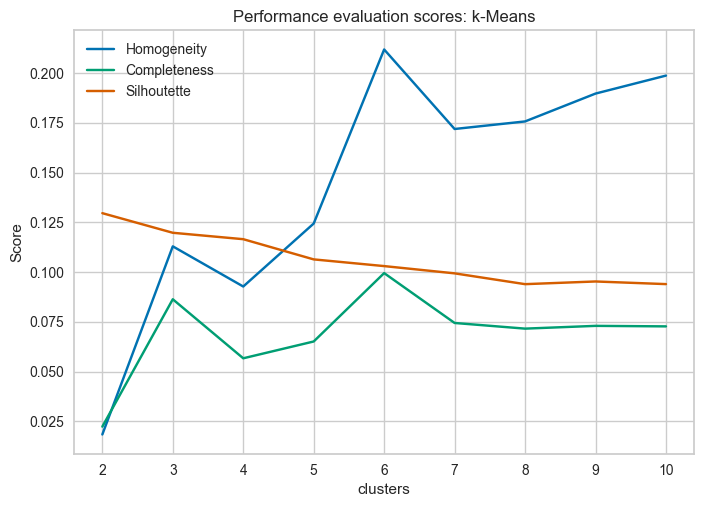

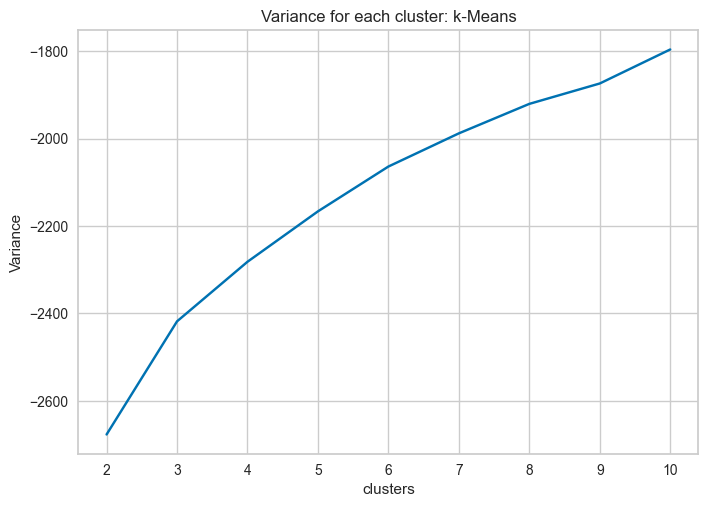

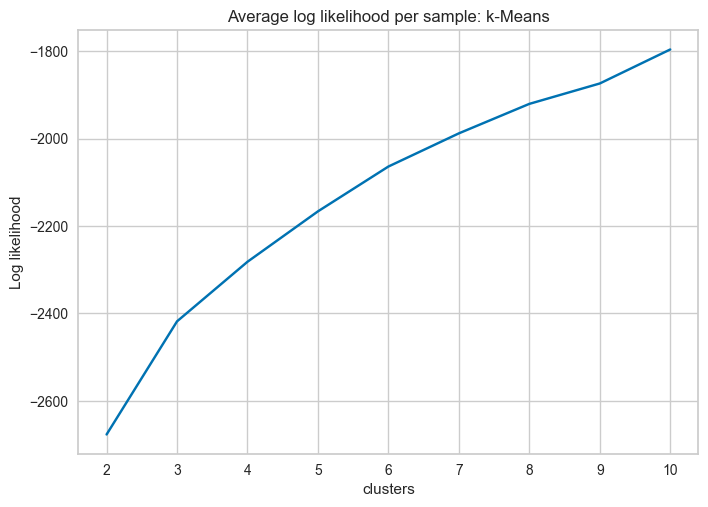

Training accuracy:  k-Means - K = 4:  40.033085194375516
Testing accuracy for  k-Means for K = 4:  36.22350674373796
accuracy_score 	 0.3622350674373796
f1 	 0.43151632580205346
confusion_mat 	 [[115  69 101  78]
 [ 11  49  25  30]
 [  0   5   6  10]
 [  0   2   0  18]]
classification_report 	               precision    recall  f1-score   support

           0       0.91      0.32      0.47       363
           1       0.39      0.43      0.41       115
           2       0.05      0.29      0.08        21
           3       0.13      0.90      0.23        20

    accuracy                           0.36       519
   macro avg       0.37      0.48      0.30       519
weighted avg       0.73      0.36      0.43       519

CPU times: user 6.1 s, sys: 8.04 s, total: 14.1 s
Wall time: 2.06 s


In [16]:
%%time
clf_kmeans = kmeans(X_train, X_test, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10], num_class = num_class)